In [4]:
import pandas as pd

# load the dataset
check_book = pd.read_csv('/Users/tanishqbakliwal/Desktop/ALY6140 PYTHON/group/checkbook_explorerfy24.csv')

# check few rows
print(check_book.info())
print(check_book.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111904 entries, 0 to 111903
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Voucher            111904 non-null  object 
 1   Voucher Line       111904 non-null  int64  
 2   Distribution Line  111904 non-null  int64  
 3   Entered            111904 non-null  object 
 4   Month(Number)      111904 non-null  int64  
 5   Month              111904 non-null  object 
 6   Fiscal Month       111904 non-null  int64  
 7   Fiscal Year        111904 non-null  int64  
 8   Year               111904 non-null  int64  
 9   Vendor Name        111904 non-null  object 
 10  Account            111904 non-null  float64
 11  Account Descr      111904 non-null  object 
 12  Dept               111904 non-null  object 
 13  Dept Name          111904 non-null  object 
 14  6 Digit Org Name   111904 non-null  object 
 15  Monetary Amount    111904 non-null  float64
dtypes:

In [5]:
# Check for missing values
print(check_book.isnull().sum())

# Create a copy of the original dataset for modification
check_book_mod = check_book.copy()

# Convert 'Entered' column to datetime format with specified format
check_book_mod['Entered'] = pd.to_datetime(check_book_mod['Entered'], format='%m/%d/%y')

# Remove redundant columns
check_book_mod = check_book_mod.drop(columns=['Month(Number)', 'Month'])

# Check the data types after cleanup
print(check_book_mod.columns)
print(check_book_mod.dtypes)


Voucher              0
Voucher Line         0
Distribution Line    0
Entered              0
Month(Number)        0
Month                0
Fiscal Month         0
Fiscal Year          0
Year                 0
Vendor Name          0
Account              0
Account Descr        0
Dept                 0
Dept Name            0
6 Digit Org Name     0
Monetary Amount      0
dtype: int64
Index(['Voucher', 'Voucher Line', 'Distribution Line', 'Entered',
       'Fiscal Month', 'Fiscal Year', 'Year', 'Vendor Name', 'Account',
       'Account Descr', 'Dept', 'Dept Name', '6 Digit Org Name',
       'Monetary Amount'],
      dtype='object')
Voucher                      object
Voucher Line                  int64
Distribution Line             int64
Entered              datetime64[ns]
Fiscal Month                  int64
Fiscal Year                   int64
Year                          int64
Vendor Name                  object
Account                     float64
Account Descr                object
Dept   

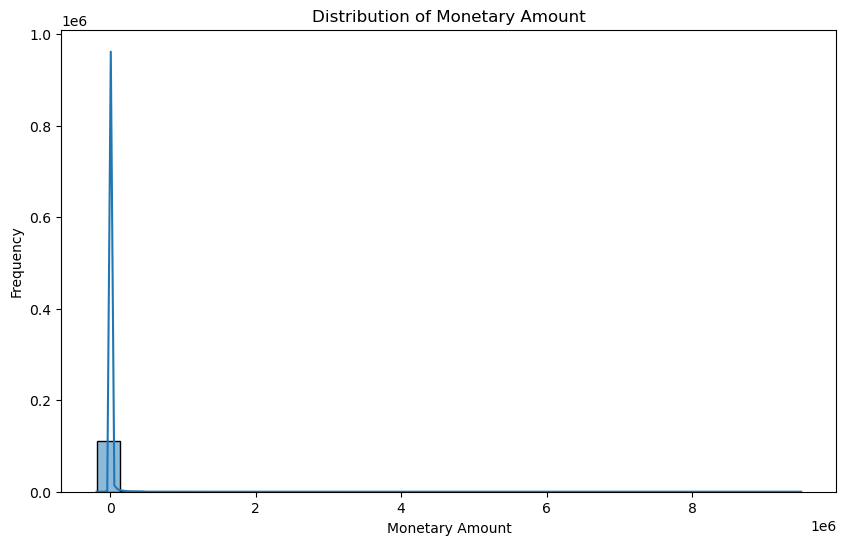

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a histogram of Monetary Amount
plt.figure(figsize=(10, 6))
sns.histplot(check_book_mod['Monetary Amount'], bins=30, kde=True)
plt.title('Distribution of Monetary Amount')
plt.xlabel('Monetary Amount')
plt.ylabel('Frequency')
plt.show()



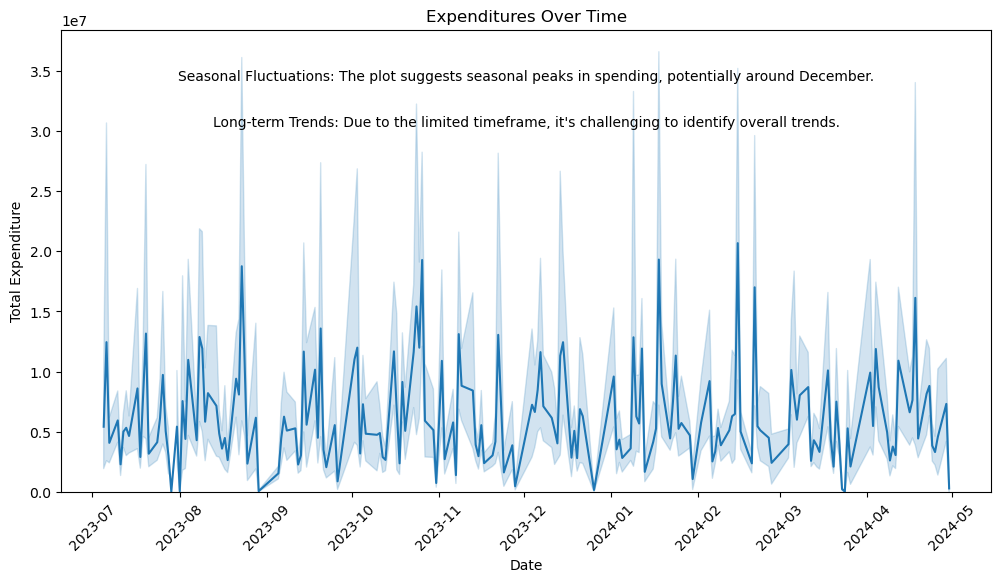

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a line plot of expenditures over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Entered', y='Monetary Amount', data=check_book_mod, estimator=sum)
plt.title('Expenditures Over Time')
plt.xlabel('Date')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)

# Additional Analysis and Adjustments
plt.ylim(bottom=0)

# Annotate key points based on the analysis provided
plt.text(0.5, 0.9, "Seasonal Fluctuations: The plot suggests seasonal peaks in spending, potentially around December.",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)

plt.text(0.5, 0.8, "Long-term Trends: Due to the limited timeframe, it's challenging to identify overall trends.",
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)

plt.show()


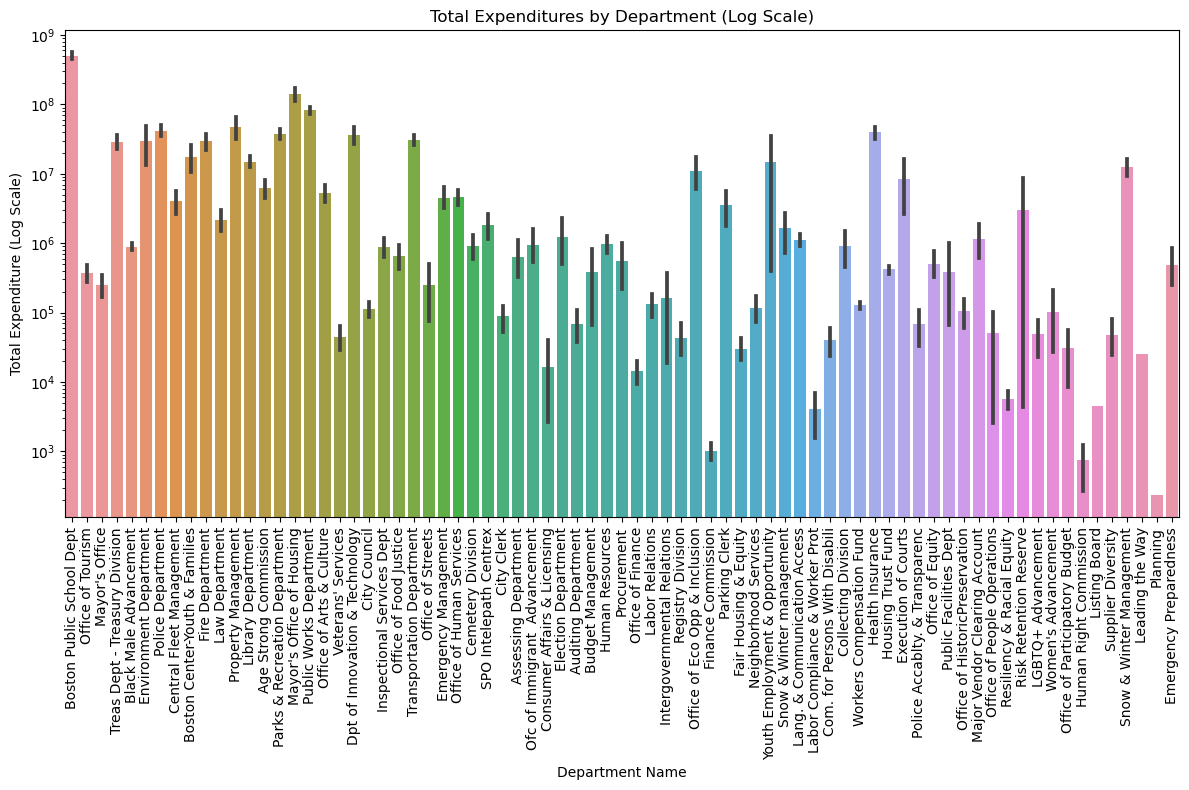

In [23]:
# Creating a bar plot with logarithmic scale for expenditures by department
plt.figure(figsize=(12, 8))
sns.barplot(x='Dept Name', y='Monetary Amount', data=check_book_mod, estimator=sum)
plt.yscale('log')
plt.title('Total Expenditures by Department (Log Scale)')
plt.xlabel('Department Name')
plt.ylabel('Total Expenditure (Log Scale)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


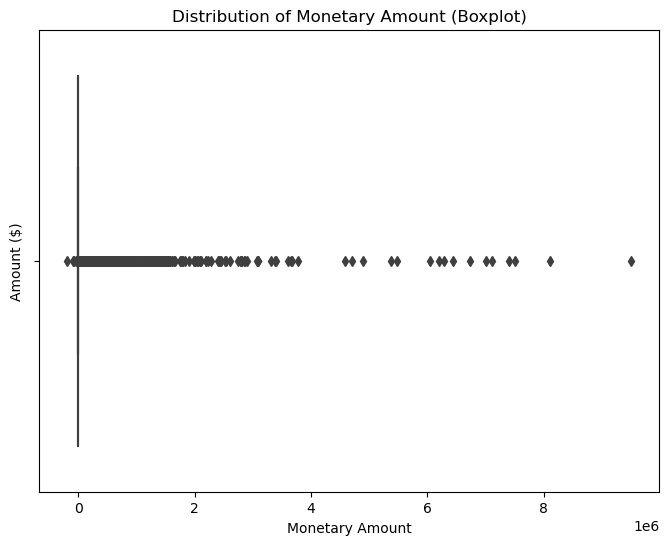

In [37]:
# Box plot of Monetary Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=check_book_mod['Monetary Amount'])
plt.title('Distribution of Monetary Amount (Boxplot)')
plt.xlabel('Monetary Amount')
plt.ylabel('Amount ($)')
plt.show()


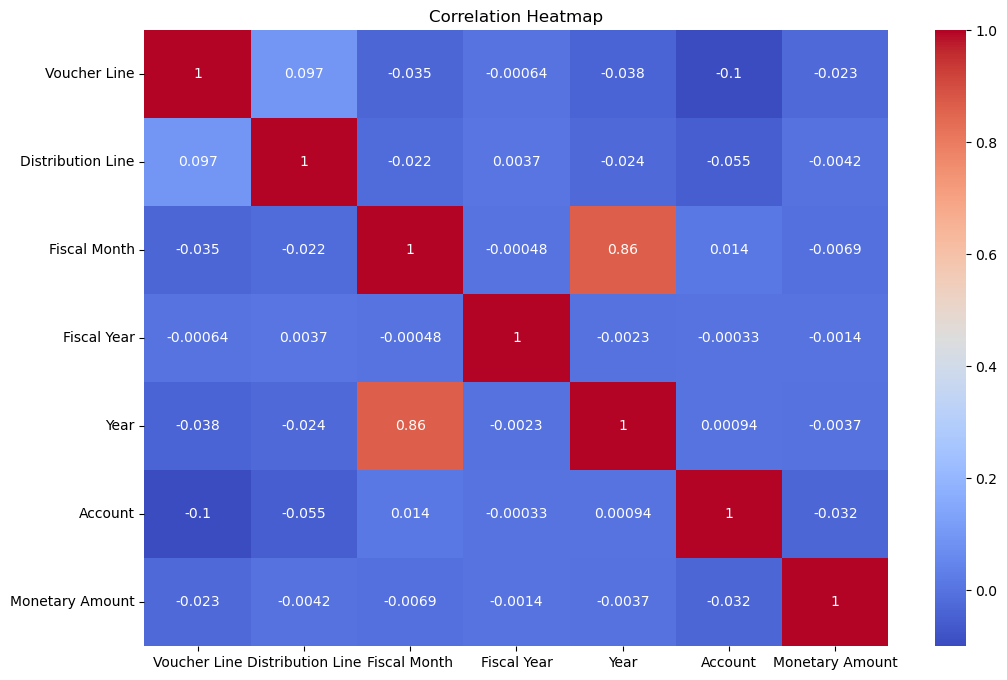

In [16]:
import numpy as np

# Add a small amount of noise to 'Fiscal Year'
check_book_mod['Fiscal Year'] = check_book_mod['Fiscal Year'] + np.random.normal(0, 1e-6, check_book_mod.shape[0])

# Select only numeric columns for the correlation heatmap
numeric_columns = check_book_mod.select_dtypes(include=['float64', 'int64']).columns

# Heatmap of correlations
plt.figure(figsize=(12, 8))
correlation_matrix = check_book_mod[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


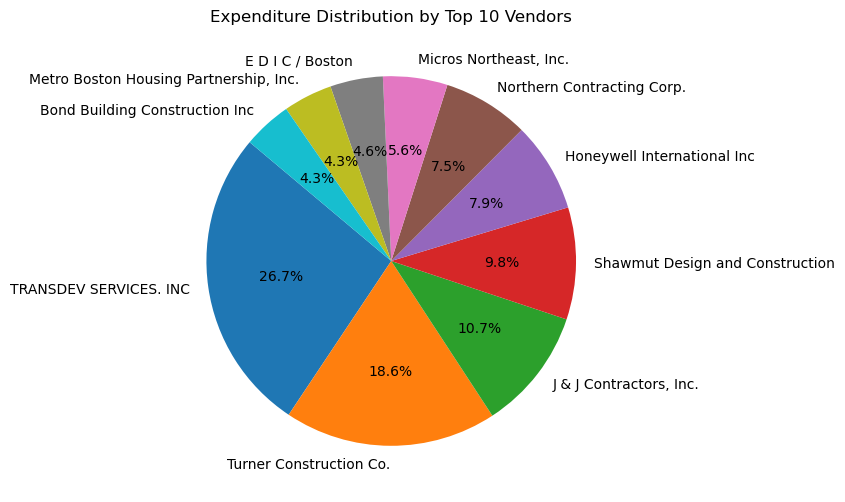

In [9]:
# Pie chart of expenditure distribution by vendor
vendor_expenses = check_book_mod.groupby('Vendor Name')['Monetary Amount'].sum()
top_vendors = vendor_expenses.nlargest(10)

plt.figure(figsize=(10, 6))
top_vendors.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Expenditure Distribution by Top 10 Vendors')
plt.ylabel('')  
plt.show()


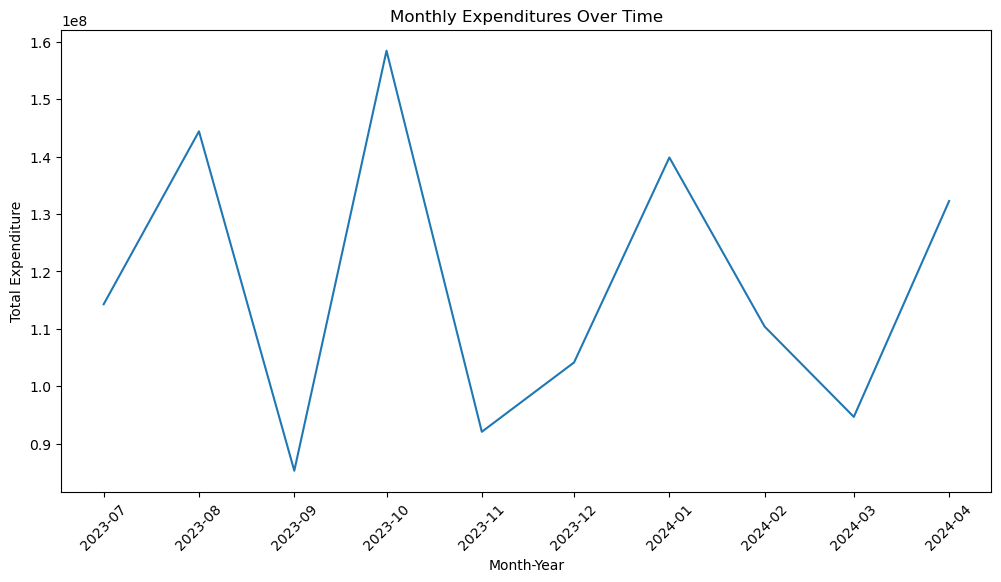

In [12]:
# Line plot of monthly expenditures
check_book_mod['Entered'] = pd.to_datetime(check_book_mod['Entered'])
check_book_mod['Month_Year'] = check_book_mod['Entered'].dt.to_period('M').astype(str) 
monthly_expenditures = check_book_mod.groupby('Month_Year')['Monetary Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Year', y='Monetary Amount', data=monthly_expenditures)
plt.title('Monthly Expenditures Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.show()


Error: ARIMA.fit() got an unexpected keyword argument 'maxiter'


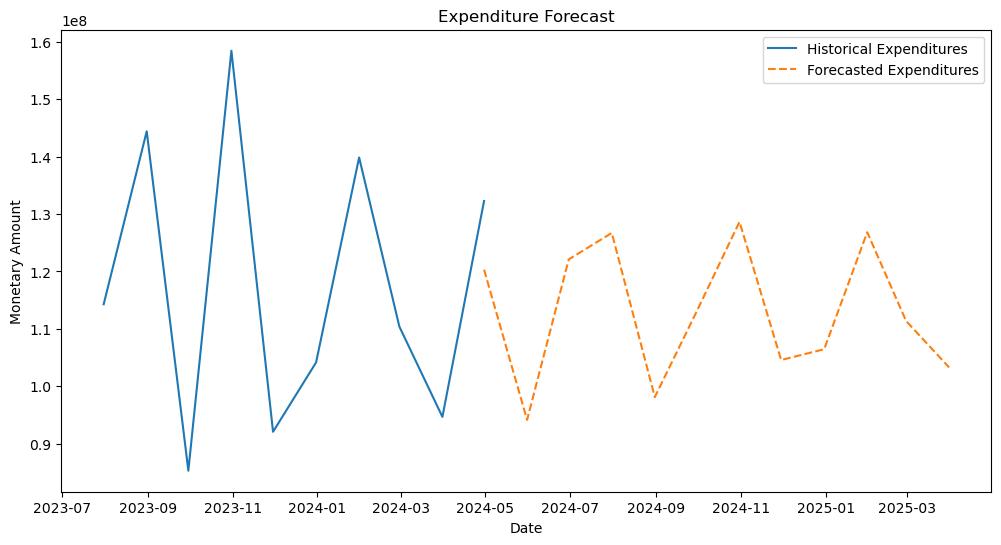

In [74]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings

# Assuming check_book_mod is your modified DataFrame
check_book_mod['Entered'] = pd.to_datetime(check_book_mod['Entered'])
check_book_mod.set_index('Entered', inplace=True)

# Aggregate the data monthly
monthly_data = check_book_mod['Monetary Amount'].resample('M').sum()

# Suppress warnings for demonstration purposes (not recommended for all cases)
warnings.filterwarnings("ignore")

# Fit ARIMA model with adjusted maxiter
try:
    model = ARIMA(monthly_data, order=(5, 1, 0))
    model_fit = model.fit(maxiter=1000)  # Increase maxiter
except Exception as e:
    print(f"Error: {e}")

# Forecast future spending
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=monthly_data.index[-1], periods=12, freq='M')

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Historical Expenditures')
plt.plot(forecast_index, forecast, label='Forecasted Expenditures', linestyle='--')
plt.title('Expenditure Forecast')
plt.xlabel('Date')
plt.ylabel('Monetary Amount')
plt.legend()
plt.show()

0.8026451007551048
              precision    recall  f1-score   support

       False       0.79      0.83      0.81     11268
        True       0.82      0.77      0.80     11113

    accuracy                           0.80     22381
   macro avg       0.80      0.80      0.80     22381
weighted avg       0.80      0.80      0.80     22381



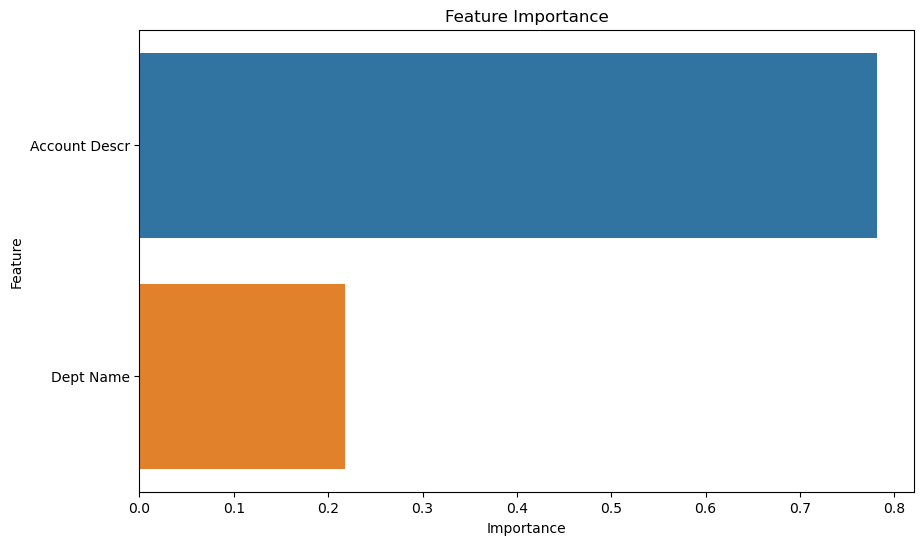

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

# Preprocess the data
label_encoders = {}
for column in ['Account Descr', 'Dept Name']:
    label_encoders[column] = LabelEncoder()
    check_book_mod[column] = label_encoders[column].fit_transform(check_book_mod[column])

# Prepare features and target
X = check_book_mod[['Account Descr', 'Dept Name']]
y = check_book_mod['Monetary Amount'] > check_book_mod['Monetary Amount'].median()  # Binary classification: high vs. low expenditure

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=clf.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


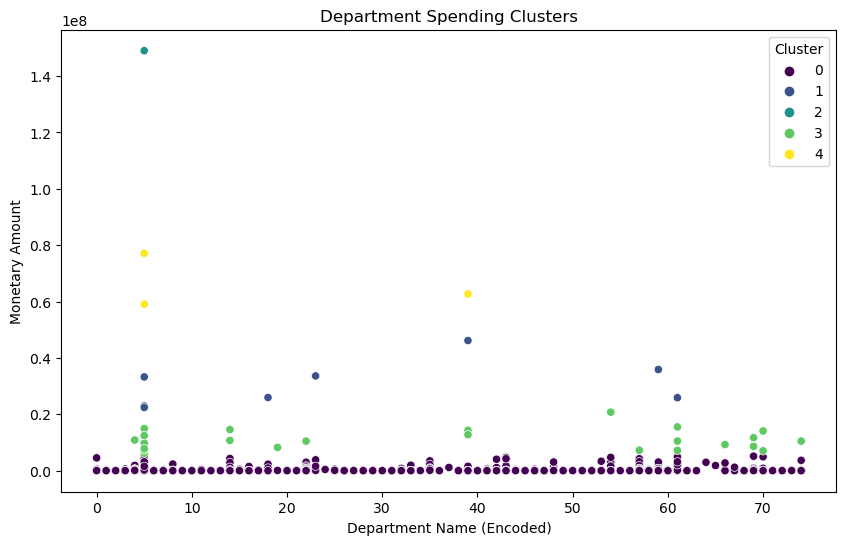

In [79]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}

# Encode 'Dept Name'
label_encoders['Dept Name'] = LabelEncoder()
check_book_mod['Dept Name'] = label_encoders['Dept Name'].fit_transform(check_book_mod['Dept Name'])

# Encode 'Account Descr'
label_encoders['Account Descr'] = LabelEncoder()
check_book_mod['Account Descr'] = label_encoders['Account Descr'].fit_transform(check_book_mod['Account Descr'])

# Aggregate data by department and account description
grouped_data = check_book_mod.groupby(['Dept Name', 'Account Descr'])['Monetary Amount'].sum().reset_index()

# Prepare features for clustering
X = grouped_data[['Dept Name', 'Account Descr', 'Monetary Amount']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
grouped_data['Cluster'] = kmeans.fit_predict(X)

# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_data, x='Dept Name', y='Monetary Amount', hue='Cluster', palette='viridis')
plt.title('Department Spending Clusters')
plt.xlabel('Department Name (Encoded)')
plt.ylabel('Monetary Amount')
plt.show()
